<a href="https://colab.research.google.com/github/AysenGC/Projects/blob/main/Springboard_Capstone_3_Brain_Tumor_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA & Pre-processing


## 1.Importing the libraries

In [ ]:
#Mounting at gdrive

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#Importing the libraries

import os
import cv2
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

##2. Importing the datasets

In [ ]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/gdrive/MyDrive/Capstone3_Data/Capstone3_Datasets/Training/')
path_test = ('/gdrive/MyDrive/Capstone3_Data/Capstone3_Datasets/Testing/')

In [ ]:
#Defining an image size and creating a path to documents

img_size = 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append(cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append(cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        

## 3.Pre-processing 

In [ ]:
#Encoding the labels

train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [ ]:
#Shapes of the input and output arrays

print("Shape of train: ",len(train_img)," and shape of test: ", len(test_img))

Shape of train:  2870  and shape of test:  394


In [ ]:
#Image data generator augments the images
#No need to rescale
#rotation_range: rotation degree
#width_shift_range: horizontal shift
#height_shift_range: vertical shift
#zoom_range: zoom 
#horizontal_flip=True: horizontal flip active
#brightness_range=[0.2,1.2]): brightness(1.0 is the neutral brightness, needed to go above 1.0 to brighten)


img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [ ]:
#Split the dataset

train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

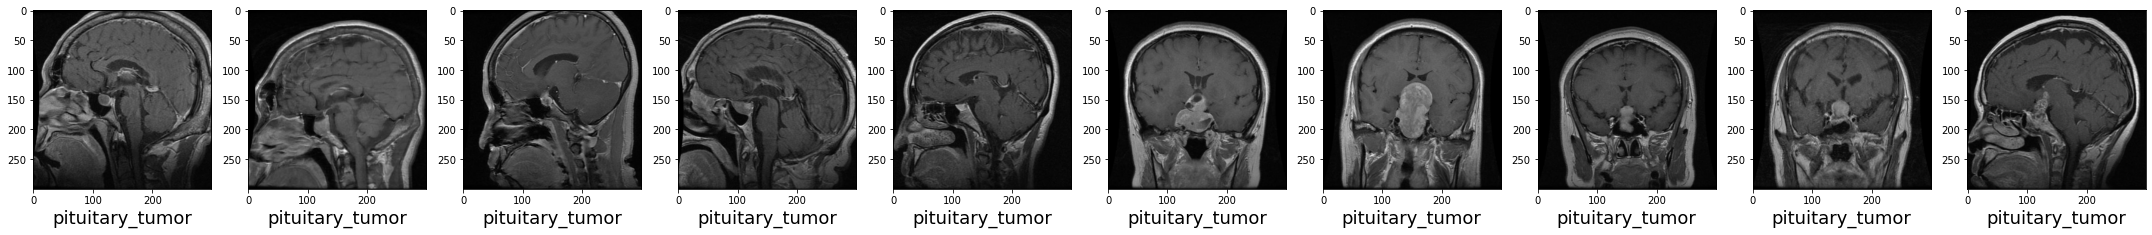

In [ ]:
#Printing the first 10 images under the folder

plt.figure(figsize = (30,30));
for i,j in enumerate(train_img):
    if i<10:
        plt.subplot(1,10,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i],fontsize=18);
        plt.tight_layout()
    else:
        break

##3. Modeling

The most common classes of artificial neural networks are:

*   Multilayer Perceptrons(MLPs)
*   Convolutional Neural Network(CNNs)\
*   Recurrent neural Networks 

These models have been proven themselves to be feasible for wide range of problems. 

A **Sequential** model of the **Convolutional Neural Network** model will be used for image classification.

The benefit of using CNN is its ability to develop an internal representation of a two-dimensional(2D) image as a one dimensional output. This allows the model to learn position and scale in wide variety of the data which is important when working with images. 

**The Sequential model API** is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

To be able to create a complete layer, Keras needs the information about **the shape of the input, number of neurons / units in the layer, initializers, regularizers, constraints, activations.**

The common layers and their functions in a sequential CNN model architecture:

**Conv2D(convolution layer):** A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. 
As a result, it will be summing up the results into a single output pixel. 
The kernel will perform the same operation for every location it slides over, transforming a 2D matrix of features into a different 2D matrix of features.

**MaxPool2D layer:** Applies a 2D max pooling over an input signal composed of several input planes. 

**Flatten layer:** Flattens the input, which returns a copy of the array in one dimensional rather than in 2-D or a multi-dimensional array.

**Dense(activation layer**):Applies the sigmoid activation or relu. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1(Note: Relu is faster than the sigmoid function).

**Dropout layer(also called Dilution):**Dropout refers to randomly "dropping out", or excluding nodes during the training to regularize a neural network and prevent overfitting.

**ReLU(Rectified Linear Activation Function):** A neural network is easier to optimize when its behavior is linear or close to linear.
When using ReLU with CNNs, they can be used as the activation function on the filter maps themselves, followed then by a pooling layer.
The ReLU function(relu) has a derivative of 0 over half it's range (the negative numbers). For positive inputs, the derivative is 1. 
In short, The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back.
The only drawback of the Relu activation function is that all the negative values become zero immediately, which decreases the ability of the model to fit or train from the data properly.
       


In [ ]:
#Sequential CNN:

model = tf.keras.Sequential(
[tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(4, activation='sigmoid')])


In [ ]:
#Compile the model and fit
#Defining the 'Adam' function:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
#Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

model.compile(optimizer=tf.keras.optimizers.Adam(0.001,0.9,0.999,1e-08),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
81/81 [==============================] - 348s 4s/step - loss: 4.0768 - accuracy: 0.5014 - val_loss: 1.0010 - val_accuracy: 0.3624
Epoch 2/20
81/81 [==============================] - 344s 4s/step - loss: 0.8580 - accuracy: 0.6431 - val_loss: 1.3586 - val_accuracy: 0.1289
Epoch 3/20
81/81 [==============================] - 346s 4s/step - loss: 0.6975 - accuracy: 0.7085 - val_loss: 0.7796 - val_accuracy: 0.5505
Epoch 4/20
81/81 [==============================] - 344s 4s/step - loss: 0.6024 - accuracy: 0.7487 - val_loss: 0.7692 - val_accuracy: 0.6307
Epoch 5/20
81/81 [==============================] - 340s 4s/step - loss: 0.5020 - accuracy: 0.7913 - val_loss: 0.6344 - val_accuracy: 0.7561
Epoch 6/20
81/81 [==============================] - 339s 4s/step - loss: 0.4557 - accuracy: 0.8192 - val_loss: 0.7280 - val_accuracy: 0.6551
Epoch 7/20
81/81 [==============================] - 338s 4s/step - loss: 0.3729 - accuracy: 0.8540 - val_loss: 1.1162 - val_accuracy: 0.4495
Epoch 8/20
81

In [ ]:
#input shape:(batch_size, height, width, depth)
#What flows between layers are tensors. Tensors can be seen as matrices, with shapes.

#In Keras, the input layer itself is not a layer, but a tensor. It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.

#Example: if you have 30 images of 50x50 pixels in RGB (3 channels), the shape of your input data is (30,50,50,3). Then your input layer tensor, must have this shape (see details in the "shapes in keras" section).

input_shape =(None,32,32,3)
model.build(input_shape)

In [ ]:
#model.get_weights()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

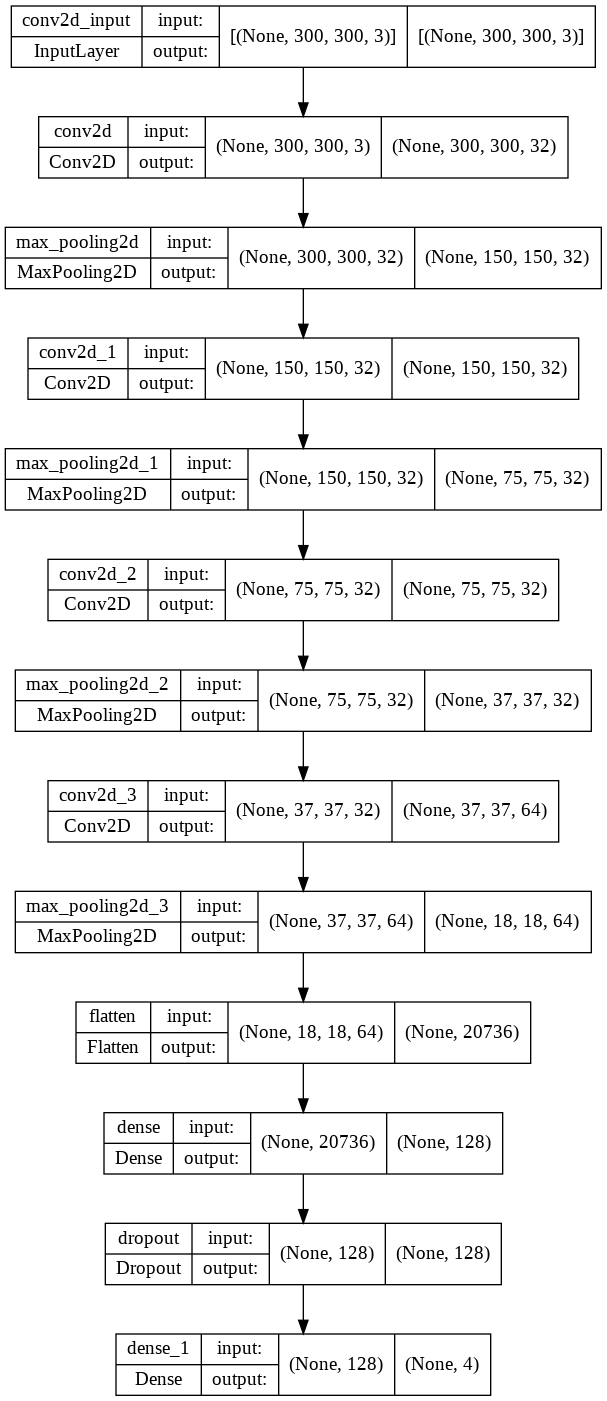

In [ ]:
#Plotting the model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
#The .fit_generator function accepts the batch of data, performs backpropagation, and updates the weights.
#The process is repeated until the desired number of epochs is reached.
#Keras can't determine when an epoch ends and a new one starts.
#steps_per_epoch:the total number of training images / by the batch size.

model.fit_generator(
        train_img,
        steps_per_epoch=50, 
        epochs=25,
        validation_data=test_img,
        validation_steps=10)          # number of training sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


ValueError: ignored

In [ ]:
score = model.evaluate(train_img,

 train_labels,batch_size=32)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)